# Investigando dados do Titanic

* Dataset [https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download]
* Data description [https://www.kaggle.com/c/titanic/data]

## 1) Introdução
<p>Como vimos no filme dirigido por James Cameron que narra o acidente do navio Titanic, mulheres e crianças são prioridade em um resgate. Nesse contexto, esse estudo tem como objetivo analisar os dados dos passageiros e verificar a correlação entre gênero, idade e sobrevivência. Adicionalmente, a correlação entre poder aquisitivo do passageiro e sua sobrevivência também será analisada. Essa informação será inferida a partir do dado se o bilhete comprado foi para uma cabine de primeira, segunda ou terceira classe.</p>
As questões que serão respondidas:
* Idade e gênero influenciaram a sobrevivência dos passageiros?
* A classe a qual eles pertenciam teve alguma influência?

## 2) Variáveis
* <b>Dependente: </b> Sobrevivência do Passageiro
* <b>Independente: </b> Gênero, idade e classe da cabine

## 3) Análise

### 3.1) Conhecendo os dados

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


%matplotlib inline

titanic_file = 'titanic_data.csv'
titanic_data = pd.read_csv(titanic_file)

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 3.1.1) Passageiros por gênero
Os dados de gênero são úteis para conhecer e relacionar a quantidade de sobreviventes homens e mulheres.

Total de passageiros: 891
Sex
female    314
male      577
dtype: int64


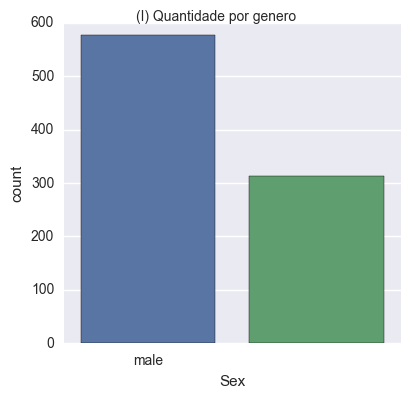

In [136]:
print "Total de passageiros:", titanic_data.PassengerId.count()
print titanic_data.groupby("Sex").size()

c = sns.factorplot(x="Sex", data=titanic_data, kind="count")
c.fig.suptitle("(I) Quantidade por genero")
c.set_xticklabels(step=2)

#### 3.1.2) Distribuição por idades
A distribuição dos passageiros por idade é apresentada para realizar um comparativo entre sobreviventes adultos e crianças.

Idade media:  29.6991176471
Desvio padrao:  14.5264973323


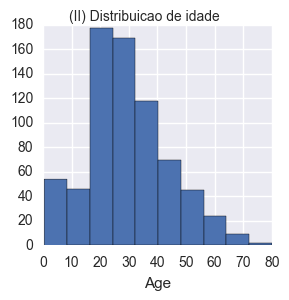

In [137]:
print "Idade media: ", titanic_data['Age'].mean()
print "Desvio padrao: ", titanic_data['Age'].std()

h = sns.FacetGrid(titanic_data, margin_titles=True)
h.fig.suptitle("(II) Distribuicao de idade")
h.map(plt.hist, "Age", bins=10)


#### 3.1.3) Passageiros agrupados por classe da cabine
O conhecimento do número de passageiros agrupados por classe da cabine é importante para verificar a correlação entre poder aquisitivo e sobrevivência no acidente.

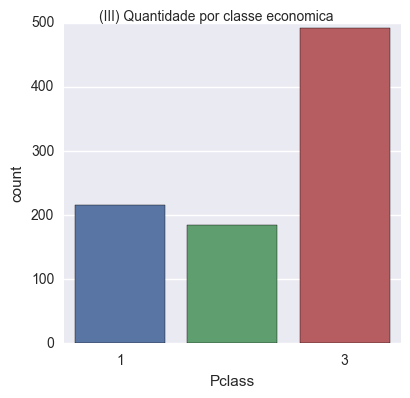

In [138]:
b = sns.factorplot(x="Pclass", data=titanic_data, kind="count")
b.fig.suptitle("(III) Quantidade por classe economica")
b.set_xticklabels(step=2)


### 3.2) Preparação dos dados
Durante essa fase é verificada a existência de falhas e valores espúrios e corrigidos para valores aceitáveis. Ao final realizamos os testes novamente para garantir que os dados foram corrigidos.

#### 3.2.1) Checagem
<p>Uma vez que em nossa análise são utilizados dados de Idade, Gênero e Classe (Pclass), devemos checar a consistência de seus valores, como procurar valores não numéricos para idade, valores impossíveis como idades negativas ou muito superior ao padrão humano, sexo indefinido ou com possíveis erros de digitação, classes faltantes ou diferentes das 3 conhecidas (primeira, segunda e terceira).</p>

<p><b>1- Checagem de idade:</b></p>

In [139]:
titanic_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

Como podemos perceber, as idades estão dentro de limites aceitáveis, porém aparentemente  há valores faltantes ou não numéricos. A quantidade de registro de idade (714) é bem menor do que a quantidade de registos de passageiros disponíveis (891). Vamos verificar a quantidade de valores nulos:

In [140]:
titanic_data.Age.isnull().sum()

177

<b>2- Checagem de sexo:</b>

In [141]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<p>Aparentemente todos os registros possuem um sexo válido. A soma de masculinos e femininos da 891, como esperado.</p>

<b>3- Checagem de classe:</b>

In [142]:
titanic_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<p>Todos os valores de classe correspondem aos conhecidos e não há dados faltantes.</p>

#### 3.2.2) Preenchendo Falhas
<p>Como podemos verificar anteriormente existem 177 valores faltantes em Age.</p>
<p>Para preencher esses valores, vamos agrupar os registros por Sex e Pclass e preenchê-los com a média para o gênero e classe.</p>
<p>Ex: Quando encontrado uma idade faltante, preenche esse valor com a média de idade do grupo e classe a qual o passageiro pertence.</p>
<p>Finalmente reexecutamos o mesmo teste realizado anteriormente e verificamos se ainda há alguma falha.</p>

In [143]:
# Grouping missing ages by Pclass and sex
mean_ages =  titanic_data.groupby(['Sex','Pclass'])['Age'].mean()

print mean_ages


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


In [144]:
def fill_missing_ages(register):
    """
    When it found a missing age, use his Pclass and Sex to fill this age with the mean of the group.
    Return: mean of the group if age is missing; or the age found.
    """
    global mean_ages
    if math.isnan(register['Age']):
        return mean_ages[register['Sex']][register['Pclass']]
    return register['Age']

titanic_data['Age'] = titanic_data.apply(fill_missing_ages, axis=1)

In [145]:
titanic_data.Age.isnull().sum()

0

Não há mais dados nulos. E assim ficam distribuídos nossos dados de Age:

In [146]:
titanic_data.Age.describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

### 3.3) Classificação dos dados
Será criado um grupo chamado GAclass (gender/age class) que classifica o passageiro como sendo (1) adulto do sexo masculino, (2) adulto do sexo feminino e (3) criança independente do sexo. Um indivíduo é classificado como adulto (homem/mulher) a partir dos 16 anos uma vez que essa idade é considerada a primeira fase da maioridade nos EUA (país de destino do navio).


In [147]:
def classify(register):
    """
    Passengers were classified according their age/gender as: woman, man or children.
        man: sex = "male" and age > 15
        woman: sex = "female" and age > 15
        children: age <=15
        
    Parameter: a register with at less Age and Sex
    Return 1 if man, 2 if woman, 3 if children
    """
    
    if register['Sex'] == 'male' and register['Age'] > 15:
        return 1
    if register['Sex'] == 'female' and register['Age'] > 15:
        return 2
    return 3
    
titanic_data['GAclass'] = titanic_data.apply(classify, axis=1)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GAclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


1    537
2    271
3     83
Name: GAclass, dtype: int64


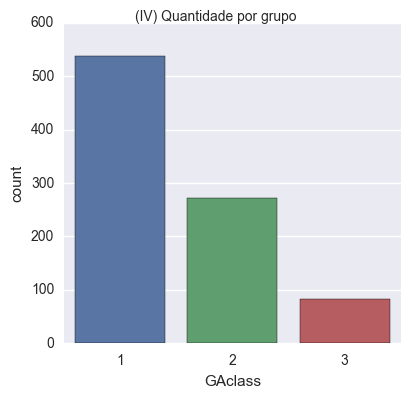

In [148]:
print titanic_data['GAclass'].value_counts()

b = sns.factorplot(x="GAclass", data=titanic_data, kind="count")
b.fig.suptitle("(IV) Quantidade por grupo")


### 3.4) Calculando correlações

Usando o método de correlação Pearson R implementado pela biblioteca Pandas, podemos verificar a correlação entre as variáveis.

In [149]:
correlation = titanic_data.corr()

print "Coerrelação entre age/gender(GAclass) e sobrevivência: ",correlation['Survived']['GAclass']
print "Correlação entre classe da cabine (Pclass) e sobrevivência: ",correlation['Survived']['Pclass']

Coerrelação entre age/gender(GAclass) e sobrevivência:  0.472636807651
Correlação entre classe da cabine (Pclass) e sobrevivência:  -0.338481035961


Pclass  GAclass
1       1          0.352941
        2          0.978022
        3          0.833333
2       1          0.080808
        2          0.909091
        3          1.000000
3       1          0.119122
        2          0.491228
        3          0.431034
Name: Survived, dtype: float64
2    205
1     88
3     49
Name: GAclass, dtype: int64


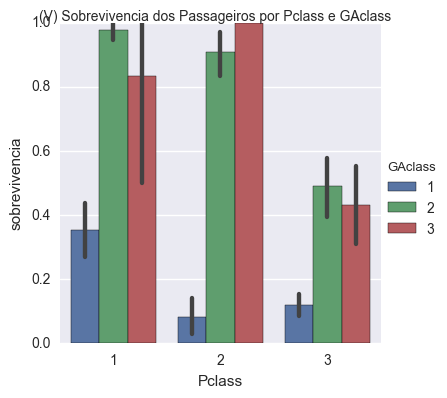

In [150]:
# Gráfico de barras comparando o grupo GAclass e classe Pclass
p = sns.factorplot(x="Pclass", y="Survived", hue="GAclass", data=titanic_data,kind="bar")
p.fig.suptitle("(V) Sobrevivencia dos Passageiros por Pclass e GAclass")
p.set_ylabels("sobrevivencia")

# Agrupando dados de sobrevivência por classe e grupo
survival_mean = titanic_data.groupby(["Pclass","GAclass"])["Survived"].mean()
print survival_mean

###
print titanic_data['GAclass'][titanic_data.Survived == 1].value_counts()  


### 4) Conclusão

<p>Através dessa análise dos dados, podemos concluir que há uma correlação entre sobrevivência e o grupo (gênero/idade) ao qual pertence o passageiro. O valor Pearson R 0.472636807651 mostra uma correlação positiva moderada entre o grupo e sobrevivência, onde vemos que mulheres e crianças poderiam ter uma chance maior de sobrevivênciado que homens. Na correlação entre classe econômica do passageiro e sobrevivência, o valor -0.338481035961 apresenta uma correlação negativa entre situação econômica e sobrevivência, onde os pobres podem ter tido uma menor chance de sobrevivência.</p>
<p>Comparando os gráficos I e V, vemos que mesmo havendo maior número de homens no navio, um número muito superior de mulheres sobreviveu. Também há disparidade entre sobrevivência entre classes das cabines, onde vemos um número maior de passageiros na terceira classe e menor número de sobreviventes comparando os gráficos III e V. Conhecendo a distribuição de idades apresentada no grafico II e posteriormente a distribuição por grupo GAclass no gráfico IV, percebemos que o número de crianças é bastante inferior ao de adultos a bordo (83 crianças e 808 adultos). Fazendo uma comparação com o gráfico V, vemos que ainda assim elas tiveram um alto índice de sobrevivência em relação aos outros grupos (49/83 = ~59% para as crianças e 293/808 = ~36% para os adultos), provavelmente puxado pela baixa sobrevivência dos homens.</p>
<p>Finalmente, o gráfico V nos mostra que a quantidade de sobreviventes dos grupos mulheres e crianças para as três classes foi expressivamente maior. Na média os passageiros de primeira classe sobreviveram mais que os da segunda, e estes mais que os da terceira, mostrando também uma correlação entre poder econômico e sobrevivência. Como destaques, vemos que: (i) os passageiros homens (grupo com menor número de sobreviventes) da primeira classe (0.35) sobreviveram mais do que a soma de de sobreviventes do mesmo grupo nas classes inferiores (0.08 + 0.12 = 0.20); e (ii) apenas na 2ª classe houve maior média de sobrevivência das crianças (1.00 contra 0.90) , enquanto nas outras as mulheres tiveram maior número (0.98 contra 0.83 na primeira classe e 0.49 contra 0.43 na terceira).</p>
<p>É importante ressaltar que essas são apenas análises iniciais observadas a partir dos dados disponíveis. E tais correlações não implicam necessariamente uma causalidade para os fatos. Para tal é necessário a realização de mais testes. Sendo assim, como trabalhos futuros podem-se utilizados os testes adequados para verificar se existem relações de causa-efeito. Também considera-se a possibilidade de realizar o estudo novamente utilizando técnicas de aprendizado de máquina e comparar as conclusões entre os dois estudos.</p>

### 5) Leituras
* MatplotLib [http://matplotlib.org/users/pyplot_tutorial.html]
* Data Visualization in Python: Advanced Functionality in Seaborn [http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/]
* Pandas.Dataframe.corr [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html]
* Seaboorn Examples [http://seaborn.pydata.org/examples/index.html]
* Interpretação do coeficiente de correlação [http://leg.ufpr.br/~silvia/CE003/node74.html]